In [1]:
from udntools.region import ServiceRegion
from udntools.channel import BaseChannel
from udntools.utils.plot import get_circle
#import warnings
#warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from udntools.utils import cdf_y_axis

In [2]:
region = ServiceRegion(0, 100,
                       0, 100,
                       100, 5000,
                       bs_distribution="single_circle",
                       ue_distribution="gaussian",
                       ue_sigma=5.0,
                       bs_radius_1=30,
                       if_fix_bs=False)

In [3]:
#基本参数设定

loss_factor_array = np.array([2.0])
lf_shape = loss_factor_array.shape[0]

bs_number_array = np.array([8, 16])
color_array = np.array(['r', 'b'])
bs_n_shape = bs_number_array.shape[0]

bs_radius_array = np.array([25.0, 50.0])
bs_r_shape = bs_radius_array.shape[0]
marker_array = ['o', 's']

# 设定仿真的信干比区间
x_axis = np.arange(-10, 21, 1)

cdf_shape = np.shape(x_axis)[0]

curves = np.zeros((lf_shape, bs_n_shape, bs_r_shape, cdf_shape))

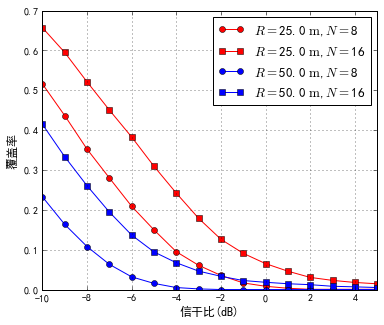

In [6]:
# 图片大小
fig = plt.figure(figsize=(6, 5))
# 使能中文字体
# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

for i, value_i in enumerate(loss_factor_array):
    channel = BaseChannel(value_i)
    for j, value_j in enumerate(bs_number_array):
        region.set_bs_number(value_j, fresh_ue=False)
        for k, value_k in enumerate(bs_radius_array):
            region.set_bs_radius_1(k, fresh_ue=True)
            sir_user_sim =10 * np.log10(
                 channel.sir_vector(region.bs_position_,
                                    region.ue_position_))
            curves[i, j, k, :] = \
                1 - cdf_y_axis(x_axis, sir_user_sim)
            f, = plt.plot(x_axis, curves[i, j, k, :],
                          color=color_array[j],
                          marker=marker_array[k],
                          label='$R=$%s$\ \mathrm{m}$,$N=$%s'%(bs_radius_array[j], bs_number_array[k]))
            plt.legend(loc='best',
                       prop={'size': 13})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=12)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=12)

plt.xlim(-10, 5)
plt.ylim(0,0.7)
plt.grid(True)

fig.savefig('pc_single_circle_n_r_gaussian.pdf')
fig.savefig('pc_single_circle_n_r_gaussian.png')
                
plt.show()